In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [96]:
start='2012-01-01'
end='2022-12-21'

stock='GOOG'

data=yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [97]:
data.reset_index(inplace=True)

In [98]:
data 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.532528,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.603836,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.373516,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.150156,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.465409,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.076508,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,90.976578,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.637405,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,88.931602,23020500


Creating 100 days and 200 days days moving average of close price

In [99]:
ma_100_days=data.Close.rolling(100).mean()
ma_200_days=data.Close.rolling(200).mean()


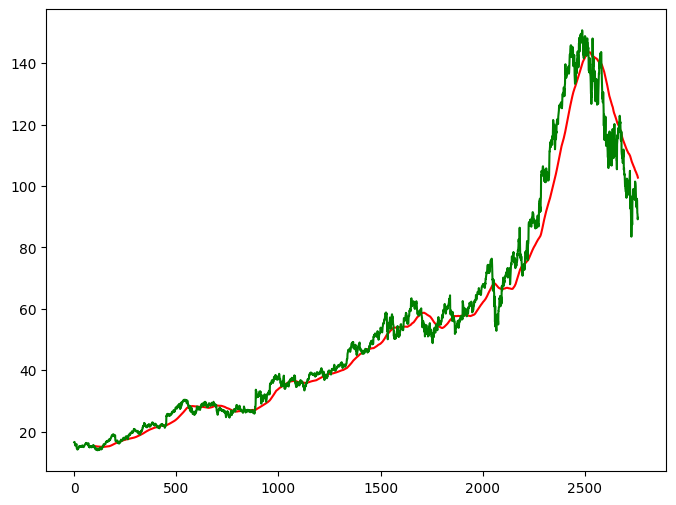

In [100]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close,'g')
plt.show()

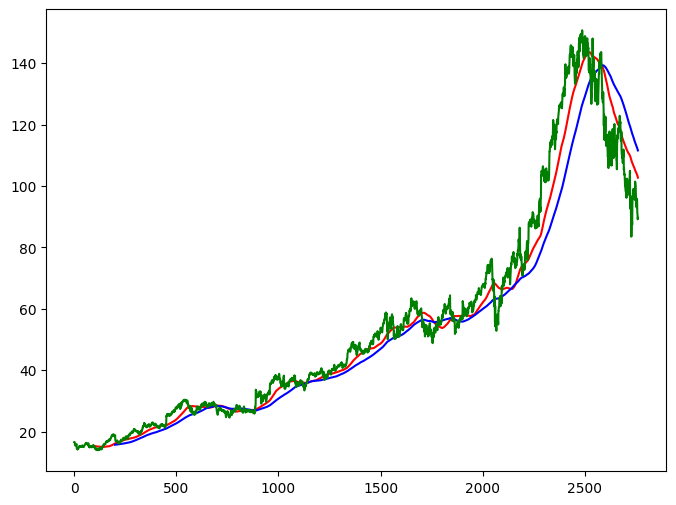

In [101]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close,'g')
plt.show()

If there are any null values the data will be deleted

In [102]:
data.dropna(inplace=True)

Splitting the data into training and test set

In [103]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.8):len(data)])

We will Scale the data into 0 and 1

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [105]:
data_train_scale=scaler.fit_transform(data_train)


Array Slicing

In [106]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [107]:
x,y=np.array(x), np.array(y)
print(len(x))
print(len(y))

2108
2108


In [108]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [109]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))


In [110]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [111]:
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
66/66 [==============================] - 13s 144ms/step - loss: 0.0352
Epoch 2/50
66/66 [==============================] - 9s 139ms/step - loss: 0.0069
Epoch 3/50
66/66 [==============================] - 9s 140ms/step - loss: 0.0058
Epoch 4/50
66/66 [==============================] - 9s 141ms/step - loss: 0.0059
Epoch 5/50
66/66 [==============================] - 9s 140ms/step - loss: 0.0057
Epoch 6/50
66/66 [==============================] - 9s 138ms/step - loss: 0.0051
Epoch 7/50
66/66 [==============================] - 9s 137ms/step - loss: 0.0048
Epoch 8/50
66/66 [==============================] - 9s 142ms/step - loss: 0.0052
Epoch 9/50
66/66 [==============================] - 9s 143ms/step - loss: 0.0048
Epoch 10/50
66/66 [==============================] - 11s 160ms/step - loss: 0.0043
Epoch 11/50
66/66 [==============================] - 9s 143ms/step - loss: 0.0042
Epoch 12/50
66/66 [==============================] - 9s 138ms/step - loss: 0.0038
Epoch 13/50
66/66 [====

In [112]:
pas_100_days=data_train.tail(100)


In [113]:
data_test=pd.concat([pas_100_days,data_test], ignore_index=True)
print(len(data_test))

653


In [114]:
data_test_scale= scaler.fit_transform(data_test)
data_test_scale

array([[0.02830229],
       [0.02593269],
       [0.03053898],
       [0.03452856],
       [0.03502425],
       [0.03435331],
       [0.04172204],
       [0.04347512],
       [0.0479483 ],
       [0.04623156],
       [0.03160285],
       [0.04744662],
       [0.05241549],
       [0.05818841],
       [0.064046  ],
       [0.02656139],
       [0.03220729],
       [0.0362393 ],
       [0.05006406],
       [0.05514178],
       [0.04597763],
       [0.04341461],
       [0.05558914],
       [0.06317545],
       [0.04356579],
       [0.04922377],
       [0.        ],
       [0.02119949],
       [0.03246722],
       [0.04723502],
       [0.0633508 ],
       [0.08209011],
       [0.07573083],
       [0.08227145],
       [0.09133275],
       [0.10992088],
       [0.09154434],
       [0.09712983],
       [0.09293465],
       [0.09557027],
       [0.0940892 ],
       [0.12441667],
       [0.12000381],
       [0.12609107],
       [0.09416778],
       [0.09186469],
       [0.10294508],
       [0.084

In [115]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])



In [116]:
x,y=np.array(x), np.array(y)

In [117]:
y_predict=model.predict(x)

18/18 [==============================] - 2s 83ms/step


In [118]:
descale =1/scaler.scale_
y_predict= y_predict*descale

In [119]:
y=y*descale


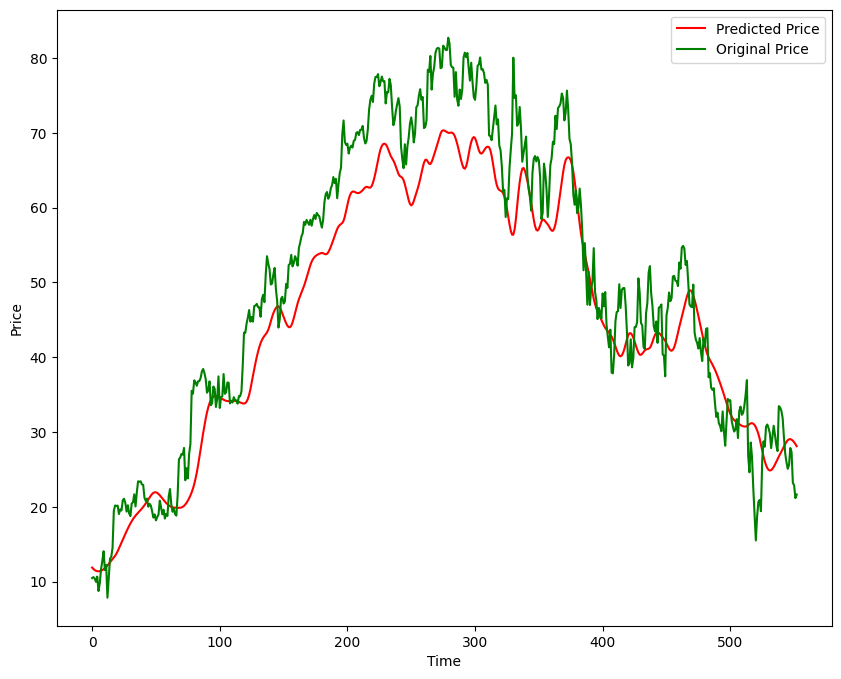

In [120]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label="Predicted Price")
plt.plot(y,'g',label="Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [121]:
model.save("Stock_Prediction_Model.keras")